In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../datasets/final_dataset_feature_engineered_v2.csv').drop_duplicates()
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,property_id,super_builtup_area,builtup_area,carpet_area,study room,pooja room,store room,servant room,others,furnishing_type,facility_score
0,house,independent,sector 25,4.35,32222.0,1350.0,Plot area 150(125.42 sq.m.),5,4,3,3.0,North,Old Property,R70162684,NaN,1350.0,NaN,0,0,0,1,0,0,49
1,flat,the close south,sector 50,3.10,12444.0,2491.0,Super Built up area 2491(231.42 sq.m.)Built Up...,3,4,3+,4.0,North-East,Moderately Old,H69433380,2491.0,2450.0,2250.0,0,0,0,1,0,2,165
2,flat,signature global city 63a,sector 63a,1.65,15263.0,1081.0,Super Built up area 1081(100.43 sq.m.),2,2,2,1.0,NaN,Under Construction,G69165782,1081.0,NaN,NaN,0,0,0,0,0,0,0
3,flat,saan verdante,sector 95,2.00,10178.0,1965.0,Super Built up area 1965(182.55 sq.m.)Carpet a...,3,4,3+,5.0,North,New Property,U70096330,1965.0,NaN,1935.0,0,0,0,1,0,0,49
4,flat,puri diplomatic greens,sector 111,3.90,13000.0,3000.0,Super Built up area 3000(278.71 sq.m.)Carpet a...,4,5,3+,6.0,North-East,Relatively New,S69742910,3000.0,NaN,2950.0,0,0,0,1,0,1,160


## Bivariate Analysis

#### property_type vs price

<Axes: xlabel='property_type', ylabel='price'>

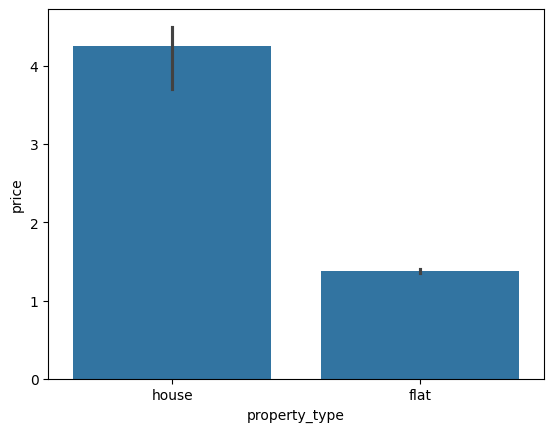

In [5]:
sns.barplot(x=df['property_type'], y=df['price'], estimator=np.median)

shows that independent houses are quite expensive than flats

<Axes: xlabel='property_type', ylabel='price'>

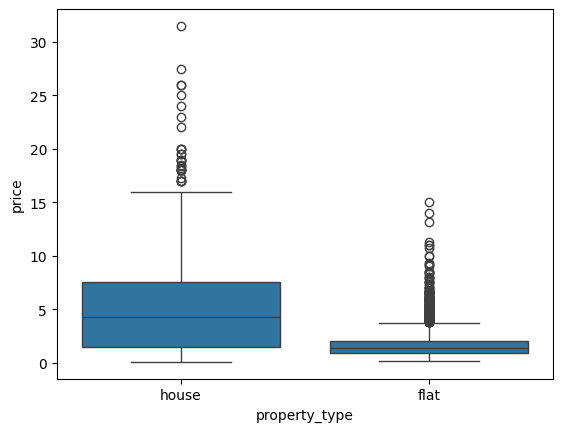

In [6]:
sns.boxplot(x=df['property_type'], y=df['price'])

#### property_type vs area

<Axes: xlabel='property_type', ylabel='builtup_area'>

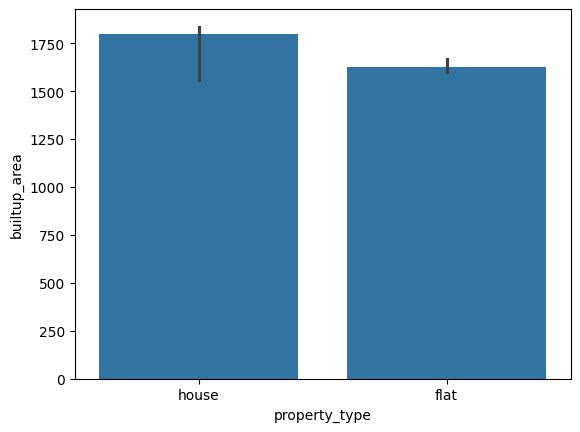

In [7]:
sns.barplot(x=df['property_type'], y=df['builtup_area'], estimator=np.median)

#### property_type vs price_per_sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

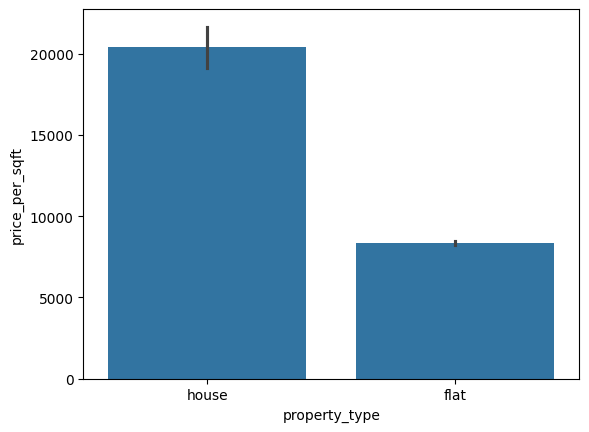

In [8]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

land price is also expensive in case of house

#### property_type vs floorNum

<Axes: xlabel='property_type', ylabel='floorNum'>

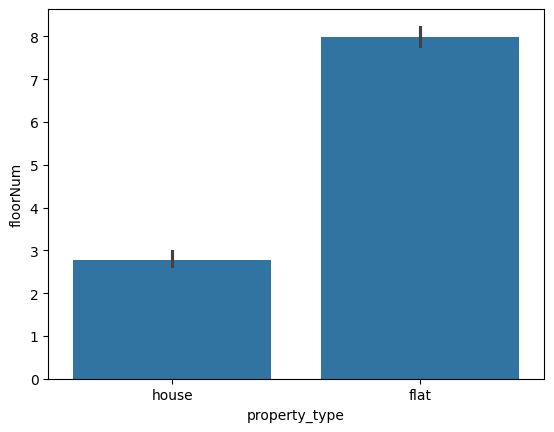

In [9]:
sns.barplot(x=df['property_type'], y=df['floorNum'])

quite obvious that houses have less floors than flats

<Axes: xlabel='property_type', ylabel='floorNum'>

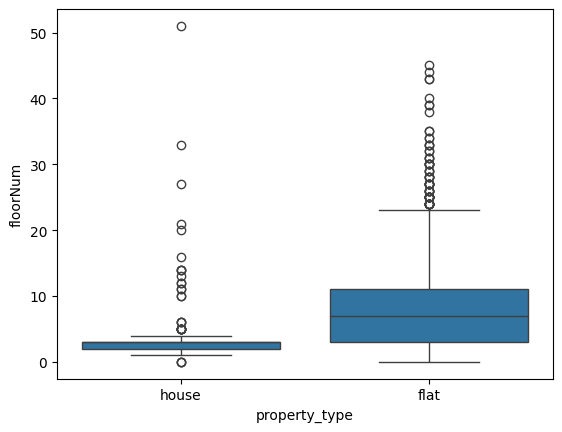

In [10]:
sns.boxplot(x=df['property_type'], y=df['floorNum'])

*some houses with greater floor nums are villas which are built on top of apartments*

#### property_type vs agePossession

<Axes: xlabel='agePossession', ylabel='property_type'>

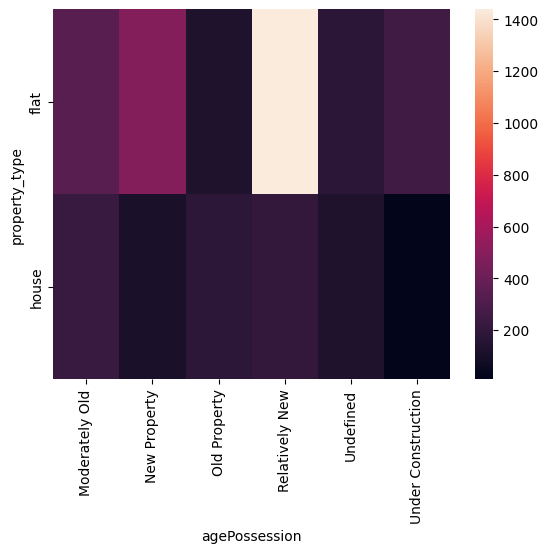

In [11]:
sns.heatmap(pd.crosstab(df['property_type'], df['agePossession']))

newly constructed buildings are mostly flats

<Axes: xlabel='agePossession', ylabel='property_type'>

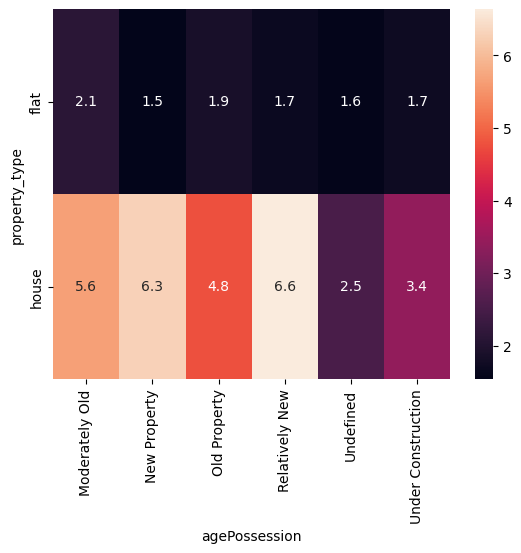

In [12]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='agePossession', values='price', aggfunc='mean'), annot=True)

#### property_type vs bedroom

<Axes: xlabel='bedRoom', ylabel='property_type'>

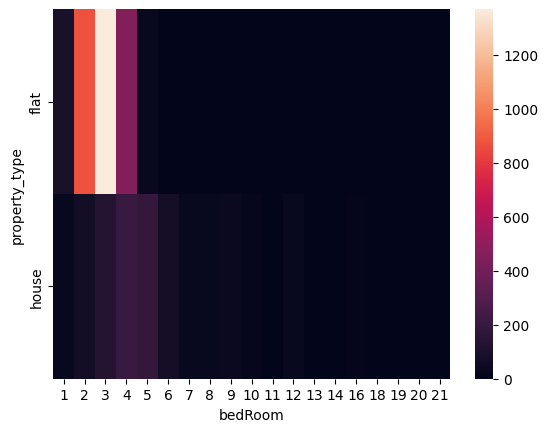

In [13]:
sns.heatmap(pd.crosstab(df['property_type'], df['bedRoom']))

<Axes: xlabel='furnishing_type', ylabel='property_type'>

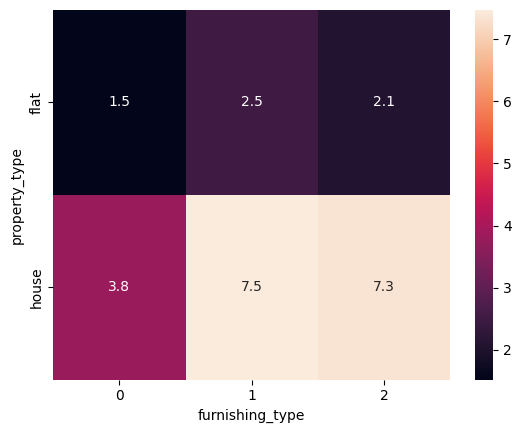

In [14]:
sns.heatmap(pd.pivot_table(df, index='property_type', columns='furnishing_type', values='price', aggfunc='mean'), annot=True)

quite obvious that the more furnished flat/house is more expensive

#### property_type vs sector

<Axes: xlabel='sector', ylabel='property_type'>

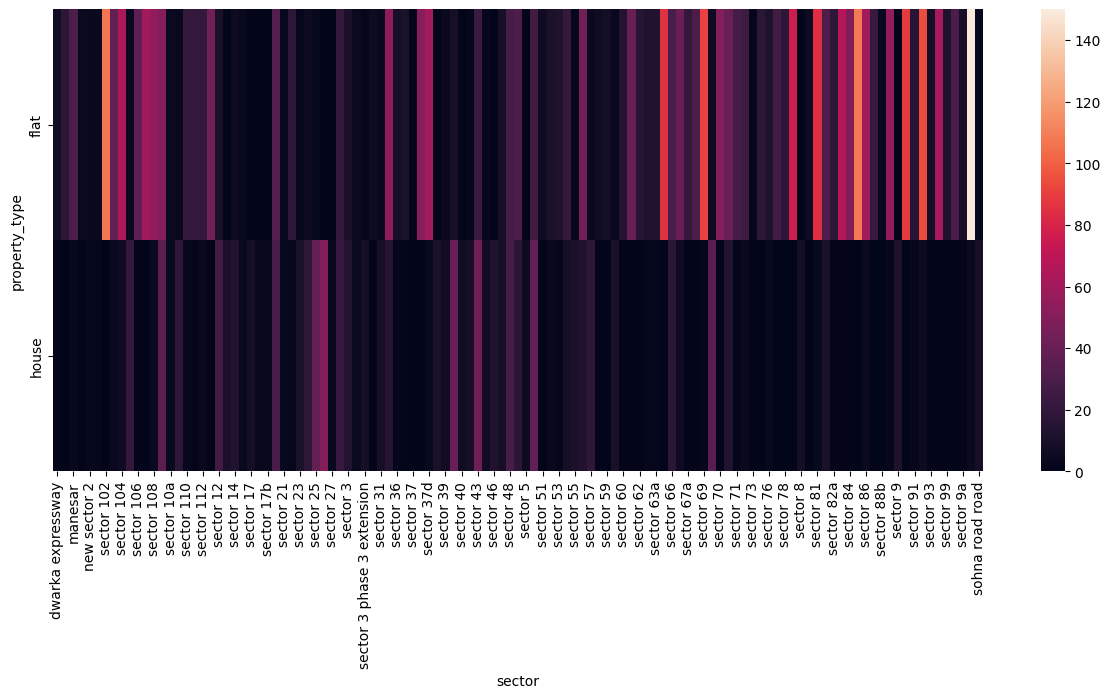

In [24]:
plt.figure(figsize=(15, 6))
sns.heatmap(pd.crosstab(df['property_type'], df['sector'].sort_index()))

this shows new sectors have more flats in construction

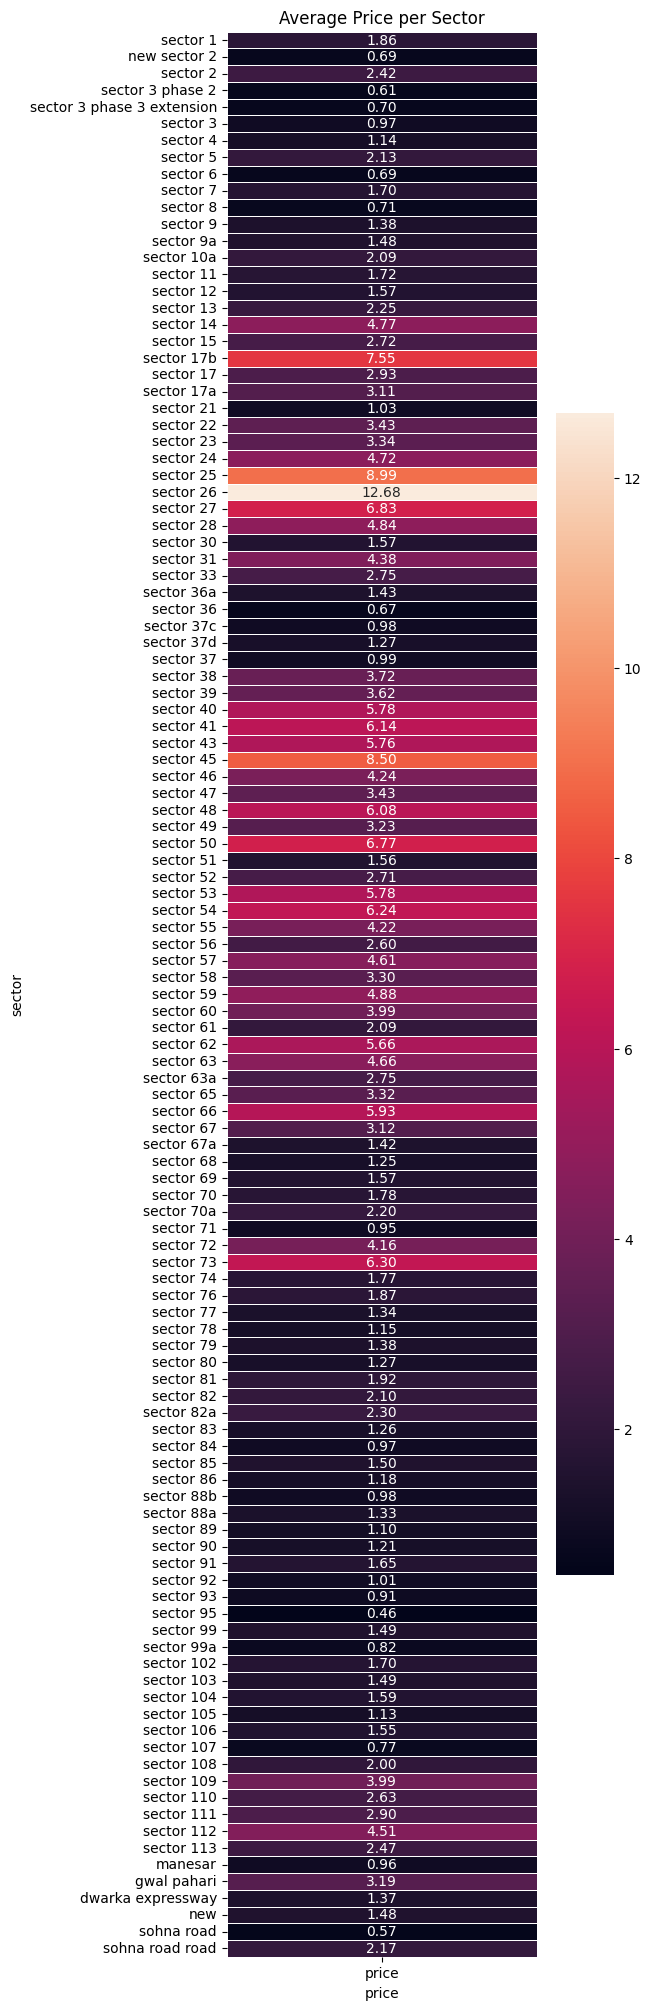

In [26]:
## sector wise pricing
import re

avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

def extract_sector_number(sector):
    match = re.search(r'\d+', sector)
    if match:
        return int(match.group())
    else:
        return float('inf')
    
    
avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

avg_price_per_sector_sorted = avg_price_per_sector.sort_values(by='sector_number')

plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted.set_index('sector')[['price']], annot=True, fmt='.2f', linewidths=.5)
plt.title('Average Price per Sector')
plt.xlabel('price')
plt.ylabel('sector')
plt.show()

<Axes: xlabel='area', ylabel='price'>

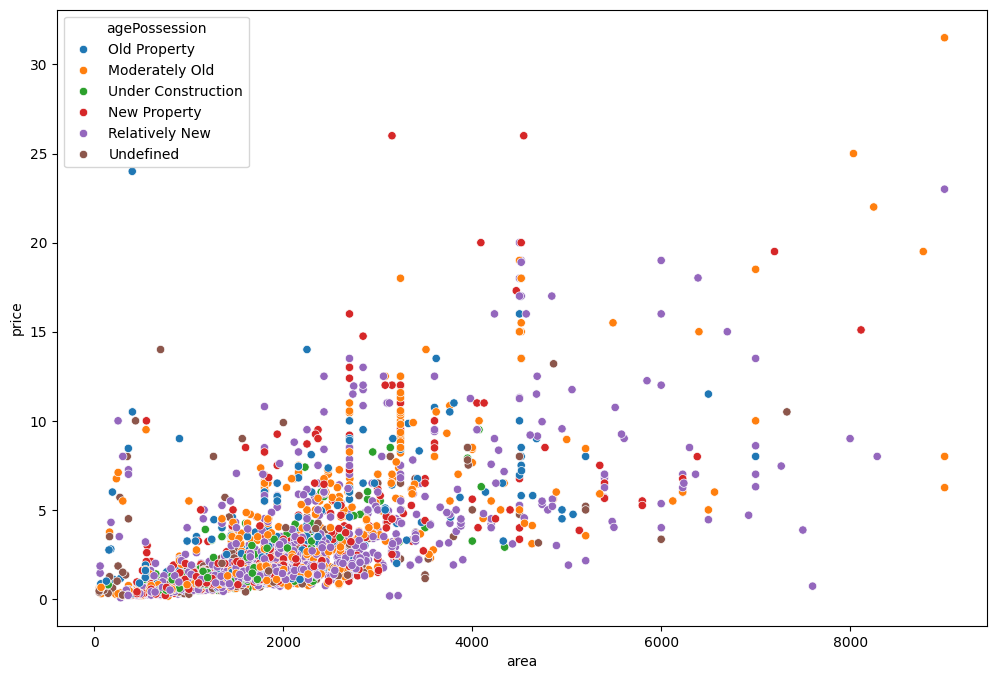

In [32]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area']<10000]['area'], y=df['price'], hue=df['agePossession'])

<Axes: xlabel='area', ylabel='price'>

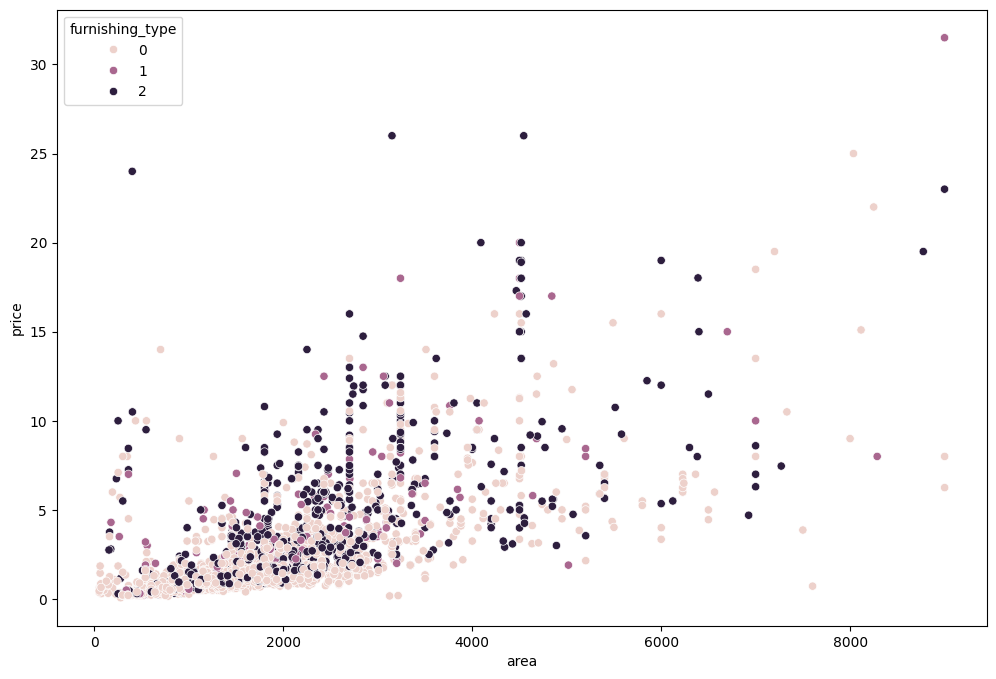

In [33]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x=df[df['area']<10000]['area'], y=df['price'], hue=df['furnishing_type'])

proportion of semi-furnished flats is less and unfurnished are maximum

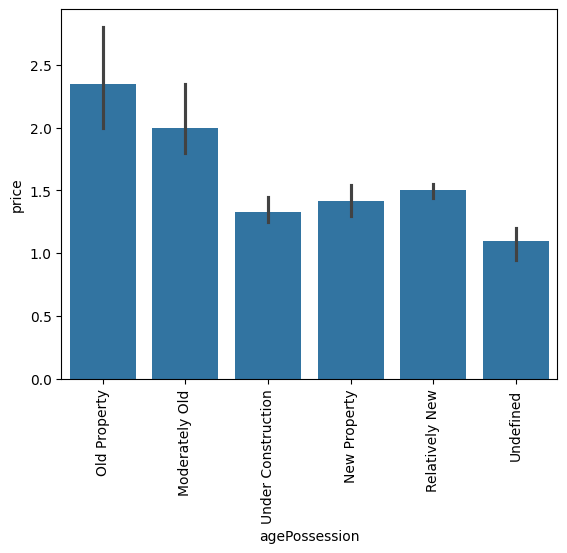

In [34]:
sns.barplot(x=df['agePossession'], y=df['price'], estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

somehow old properties are more costlier, don't know why, need to check

<Axes: xlabel='facility_score', ylabel='price'>

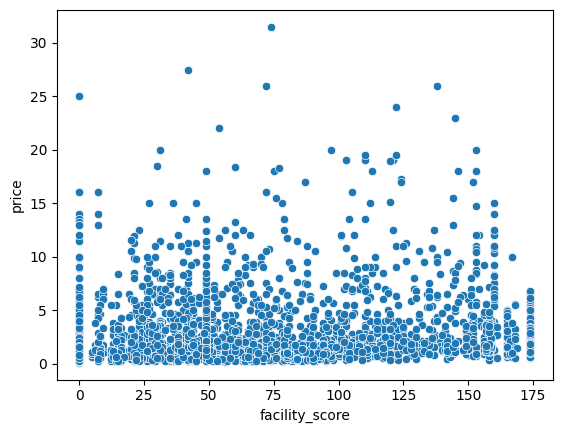

In [35]:
sns.scatterplot(x=df['facility_score'], y=df['price'])

Quite unexpected that it seems there is no relation between price and facility-score which must be there. 

<Axes: >

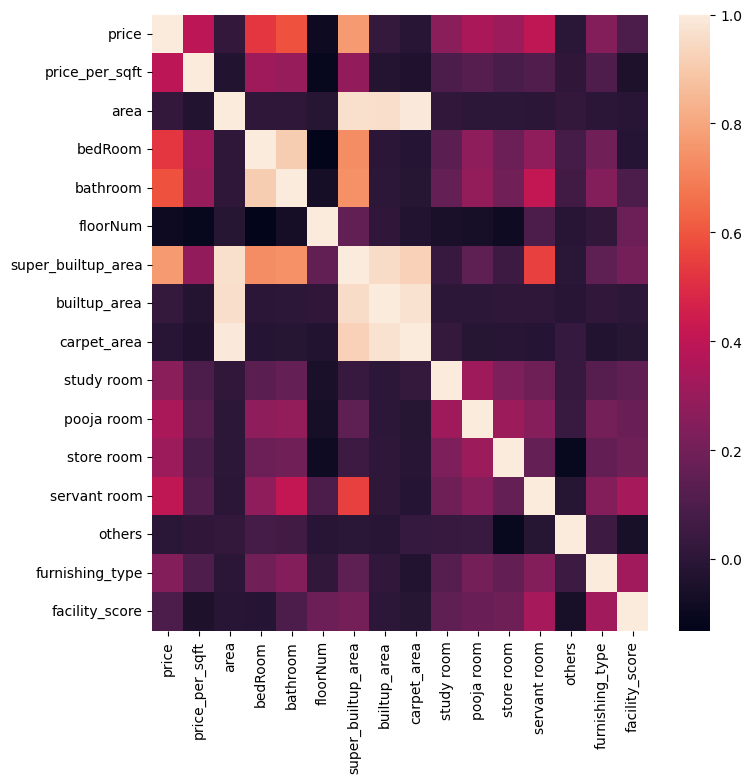

In [41]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(numeric_only=True))

In [43]:
# dependence of price on rest 
df.corr(numeric_only=True)['price'].sort_values(ascending=False)

price                 1.000000
super_builtup_area    0.769416
bathroom              0.589893
bedRoom               0.523000
servant room          0.401056
price_per_sqft        0.391339
pooja room            0.341582
store room            0.309180
study room            0.258709
furnishing_type       0.244319
facility_score        0.094791
builtup_area          0.024110
area                  0.019638
others               -0.003418
carpet_area          -0.011344
floorNum             -0.094306
Name: price, dtype: float64